<a href="https://colab.research.google.com/github/Gupta-Vaishali/Song-Genre-Classification/blob/main/AI_project_Textual_words.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


```
Dataset name : english_cleaned_lyrics.csv
The attributes are : 
Unnamed 0 : This attribute is of no value to us.
Index : This attribute contains the index no. for each record.
Song : This attribute contains the name of the song.
Year : This attribute contains the year the song was released.
Artist : This attribute contains the name of the artist of the song.
Lyrics : This attribute contains the lyrics of the song.
Genre : This attribute specifies the genre of the song. This is the target variable.

Aim of project : Song Genre Classification and 
                Quantitative Sentiment Analysis of Lyrics in Popular Music

ML Task Type : Classification.
```

In [ ]:
# Path of dataset
path = "/content/drive/MyDrive/english_cleaned_lyrics.csv"

In [ ]:
# Importing required modules
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

```
Dataset Loading and Preprocessing
```

In [ ]:
# Loading csv into df
df=pd.read_csv(path)             
df.head()

,Unnamed: 0,index,song,year,artist,genre,lyrics
0,0,0,ego-remix,2009,beyonce-knowles,Pop,Oh baby how you doing You know I'm gonna cut r...
1,1,1,then-tell-me,2009,beyonce-knowles,Pop,playin everything so easy it's like you seem s...
2,2,2,honesty,2009,beyonce-knowles,Pop,If you search For tenderness It isn't hard to ...
3,3,3,you-are-my-rock,2009,beyonce-knowles,Pop,Oh oh oh I oh oh oh I If I wrote a book about ...
4,4,4,black-culture,2009,beyonce-knowles,Pop,Party the people the people the party it's pop...


In [ ]:
# Deleting columns - Unnamed:0 and index
del df['Unnamed: 0']  
del df['index']                 
df.head()

,song,year,artist,genre,lyrics
0,ego-remix,2009,beyonce-knowles,Pop,Oh baby how you doing You know I'm gonna cut r...
1,then-tell-me,2009,beyonce-knowles,Pop,playin everything so easy it's like you seem s...
2,honesty,2009,beyonce-knowles,Pop,If you search For tenderness It isn't hard to ...
3,you-are-my-rock,2009,beyonce-knowles,Pop,Oh oh oh I oh oh oh I If I wrote a book about ...
4,black-culture,2009,beyonce-knowles,Pop,Party the people the people the party it's pop...


In [ ]:
# Checking if there is any null value in the dataset
df.isnull().any(axis = 1).sum()

1

In [ ]:
# Total no. of records in the dataset 
print("Total no. of records in the dataset are :",len(df))

Total no. of records in the dataset are : 218210


In [ ]:
# Converting all the lyrics & titles to lowercase
df['lyrics'] = df['lyrics'].str.lower()
df['song'] = df['song'].str.lower()
df.head()

,song,year,artist,genre,lyrics
0,ego-remix,2009,beyonce-knowles,Pop,oh baby how you doing you know i'm gonna cut r...
1,then-tell-me,2009,beyonce-knowles,Pop,playin everything so easy it's like you seem s...
2,honesty,2009,beyonce-knowles,Pop,if you search for tenderness it isn't hard to ...
3,you-are-my-rock,2009,beyonce-knowles,Pop,oh oh oh i oh oh oh i if i wrote a book about ...
4,black-culture,2009,beyonce-knowles,Pop,party the people the people the party it's pop...


In [ ]:
# Diplaying no. of unique artists and genres in the dataset
artist_unique = df['artist'].unique()
print("Total no. of unique artists present in dataset :",len(artist_unique))
for i in range(len(artist_unique)):
  if i != len(artist_unique) - 1 :
    print(artist_unique[i],",",end=" ")
  else :
    print(artist_unique[i]) 

genre_unique = df['genre'].unique()
print("\nTotal no. of unique genres present in dataset :",len(genre_unique))
for i in range(len(genre_unique)):
  if i != len(genre_unique) - 1 :
    print(genre_unique[i],",",end=" ")
  else :
    print(genre_unique[i]) 

Total no. of unique artists present in dataset : 10431
beyonce-knowles , eazy-e , asher-monroe , alice-on-the-roof , borialis , demonaz , dave-sterling , brightwood , cenk-r-lr-etin , destroy , gene-watson , bobby-charles , a-dream-too-late , fang , anna-waronker , the-books , alathea , graveyard , chant , arcade-fire , funkadelic , arthur-big-boy-crudup , chuckie , brian-simpson , asia-nitollano , children-18-3 , evan-taubenfeld , exit-this-side , brandi-carlile , echoterra , b3 , club-america , billy-bland , chad-brownlee , aubrie-sellers , beckett , the-easton-ellises , eljay , capleton , dead-ceremony , fatima-mansions , gei , andy-m-stewart , flamboyant-bella , claypool-lennon-delirium , earthtone9 , coconut-sunday , dreadful-shadows , the-boy-least-likely-to , c-w-stoneking , genghis-tron , desert-noises , al-stewart , the-colors , all-caps , capture-the-crown , busy-signal , atreyu , bless-the-fall , del-the-funky-homosapien , 8mm , dnl , gluecifer , dear-stalker , the-explosion

In [ ]:
# Tokenisation and removing stop words
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize
l = []
stop_words = set(stopwords.words('english')) 
for i in df.index:
  sentence = df.loc[i,'lyrics']
  word_tokens = word_tokenize(sentence)
  filtered_sentence = [w for w in word_tokens if not w in stop_words]
  l.append(filtered_sentence)

df['token_lyrics'] = l
df.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,song,year,artist,genre,lyrics,token_lyrics
0,ego-remix,2009,beyonce-knowles,Pop,oh baby how you doing you know i'm gonna cut r...,"[oh, baby, know, 'm, gon, na, cut, right, chas..."
1,then-tell-me,2009,beyonce-knowles,Pop,playin everything so easy it's like you seem s...,"[playin, everything, easy, 's, like, seem, sur..."
2,honesty,2009,beyonce-knowles,Pop,if you search for tenderness it isn't hard to ...,"[search, tenderness, n't, hard, find, love, ne..."
3,you-are-my-rock,2009,beyonce-knowles,Pop,oh oh oh i oh oh oh i if i wrote a book about ...,"[oh, oh, oh, oh, oh, oh, wrote, book, stand, t..."
4,black-culture,2009,beyonce-knowles,Pop,party the people the people the party it's pop...,"[party, people, people, party, 's, popping, si..."


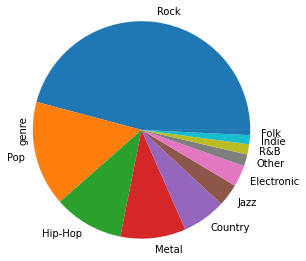

In [ ]:
# Showing a pie-chart of all the genres in the dataset
df['genre'].value_counts().plot.pie(radius=1.25)

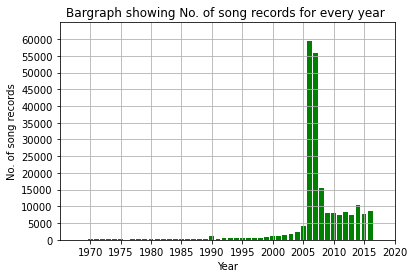

In [ ]:
# Bargraph showing No. of song records for every year 
freq = []
year = df['year'].unique()
year.sort()
for i in year :
  freq.append(len(df[df['year']==i])) 
plt.bar(year,freq,color="green")
plt.title("Bargraph showing No. of song records for every year ")
plt.xlabel("Year")
plt.ylabel("No. of song records")
plt.axis([1965,2020,0,65000])
plt.xticks(np.arange(1970, 2021, 5))
plt.yticks(np.arange(0, 65000, 5000))
plt.grid(True)
plt.show()

Lemmatization of Lyrics and Song titles

In [ ]:
# Required libraries for lemmatization
!pip install pattern
import pattern
from pattern.en import lemma, lexeme

In [ ]:
# Lemmatizing lyrics
Lemmatized_lyrics = []
for i in df.index :
  s = df.loc[i,'token_lyrics']
  s = " ".join([lemma(wd) for wd in s ])
  Lemmatized_lyrics.append(s)
df['lemmatized_lyrics'] = Lemmatized_lyrics
df.head(20)

,song,year,artist,genre,lyrics,token_lyrics,lemmatized_lyrics
0,ego-remix,2009,beyonce-knowles,Pop,oh baby how you doing you know i'm gonna cut r...,"[oh, baby, know, 'm, gon, na, cut, right, chas...",oh baby know be gon na cut right chase women m...
1,then-tell-me,2009,beyonce-knowles,Pop,playin everything so easy it's like you seem s...,"[playin, everything, easy, 's, like, seem, sur...",playin everythe easy be like seem sure still w...
2,honesty,2009,beyonce-knowles,Pop,if you search for tenderness it isn't hard to ...,"[search, tenderness, n't, hard, find, love, ne...",search tendernes be hard find love need live l...
3,you-are-my-rock,2009,beyonce-knowles,Pop,oh oh oh i oh oh oh i if i wrote a book about ...,"[oh, oh, oh, oh, oh, oh, wrote, book, stand, t...",oh oh oh oh oh oh write book stand title book ...
4,black-culture,2009,beyonce-knowles,Pop,party the people the people the party it's pop...,"[party, people, people, party, 's, popping, si...",party people people party be pop sit around se...
5,all-i-could-do-was-cry,2009,beyonce-knowles,Pop,i heard church bells ringing i heard a choir s...,"[heard, church, bells, ringing, heard, choir, ...",hear church bell ring hear choir sing see love...
6,once-in-a-lifetime,2009,beyonce-knowles,Pop,this is just another day that i would spend wa...,"[another, day, would, spend, waitin, right, on...",another day would spend waitin right one stare...
7,waiting,2009,beyonce-knowles,Pop,waiting waiting waiting waiting waiting waitin...,"[waiting, waiting, waiting, waiting, waiting, ...",wait wait wait wait wait wait wait wait wait w...
8,slow-love,2009,beyonce-knowles,Pop,i read all of the magazines while waiting aro...,"[read, magazines, waiting, around, said, could...",read magazine wait around say can be wait see ...
9,why-don-t-you-love-me,2009,beyonce-knowles,Pop,n n now honey you better sit down and look aro...,"[n, n, honey, better, sit, look, around, 'caus...",n n honey better sit look around 'cause must h...


Further Dataset Analysis and Visualisation

In [ ]:
# Finding unique stemmed tokenised words in lyrics of each song and saving it as a new column
def unique(list1):
   # for any list of strings, return a list of unique words
     unique_list = []
     for x in list1:
         if x not in unique_list:
              unique_list.append(x)
     return unique_list

masterList = []
for i in df.index:
    lemma_lyr = df.loc[i,'lemmatized_lyrics']
    lemma_lyr = lemma_lyr.split()
    masterList.append(unique(lemma_lyr))

df['uniquewords'] = masterList
df.head()

,song,year,artist,genre,lyrics,token_lyrics,lemmatized_lyrics,uniquewords
0,ego-remix,2009,beyonce-knowles,Pop,oh baby how you doing you know i'm gonna cut r...,"[oh, baby, know, 'm, gon, na, cut, right, chas...",oh baby know be gon na cut right chase women m...,"[oh, baby, know, be, gon, na, cut, right, chas..."
1,then-tell-me,2009,beyonce-knowles,Pop,playin everything so easy it's like you seem s...,"[playin, everything, easy, 's, like, seem, sur...",playin everythe easy be like seem sure still w...,"[playin, everythe, easy, be, like, seem, sure,..."
2,honesty,2009,beyonce-knowles,Pop,if you search for tenderness it isn't hard to ...,"[search, tenderness, n't, hard, find, love, ne...",search tendernes be hard find love need live l...,"[search, tendernes, be, hard, find, love, need..."
3,you-are-my-rock,2009,beyonce-knowles,Pop,oh oh oh i oh oh oh i if i wrote a book about ...,"[oh, oh, oh, oh, oh, oh, wrote, book, stand, t...",oh oh oh oh oh oh write book stand title book ...,"[oh, write, book, stand, title, would, ``, lif..."
4,black-culture,2009,beyonce-knowles,Pop,party the people the people the party it's pop...,"[party, people, people, party, 's, popping, si...",party people people party be pop sit around se...,"[party, people, be, pop, sit, around, see, loo..."


In [ ]:
# Creating a subset of the dataset for further analysis and visulaization
df_sample = {}
df_subset = pd.DataFrame()
for i in genre_unique :
  df_sample[i] = df.loc[df['genre']==i].sample(frac=1).reset_index(drop=True)
  df_sample[i] = df_sample[i][:55]
  df_subset = pd.concat([df_sample[i],df_subset])
  df_subset = df_subset.sample(frac=1)
df_subset = df_subset.reset_index(drop=True)
print("No. of records in smaller sample = ",len(df_subset))
df_subset.head()

No. of records in smaller sample =  605


,song,year,artist,genre,lyrics,token_lyrics,lemmatized_lyrics,uniquewords
0,you-alone,2016,foursquare-worship,Other,verse 1 beginning and the end creator of all t...,"[verse, 1, beginning, end, creator, things, fo...",verse 1 begin end creator thing forever remain...,"[verse, 1, begin, end, creator, thing, forever..."
1,carnival,2007,crduan-xshadows,Electronic,if your very very quiet and do not make a soun...,"[quiet, make, sound, 'll, share, little, secre...",quiet make sound will share little secret seem...,"[quiet, make, sound, will, share, little, secr..."
2,under-this-ground,2007,eldritch,Metal,another boy in lost again under our horrified ...,"[another, boy, lost, horrified, eyes, one, one...",another boy lose horrify eye one one swallow h...,"[another, boy, lose, horrify, eye, one, swallo..."
3,morning-doze,2015,fitzcataldo-the-trivettes,Other,morning doze i find myself emerging from the f...,"[morning, doze, find, emerging, floor, ocean, ...",morn doze find emerge floor ocean scent red be...,"[morn, doze, find, emerge, floor, ocean, scent..."
4,mexican-divorce,2016,burt-bacharach,Pop,down below el paso lies juarez mexico is diffe...,"[el, paso, lies, juarez, mexico, different, ye...",el paso lie juarez mexico different ye like tr...,"[el, paso, lie, juarez, mexico, different, ye,..."


In [ ]:
#Create a new dataframe of all the  words used in lyrics and its genre and showing frequency of words in each genre
from sklearn.feature_extraction.text import CountVectorizer
#list used to store the information
set_uniquewords = []
set_genres = []

#Iterate through each word and genre and stores them into the new lists
for i in df_subset.index:
    for word in df_subset.loc[i,'uniquewords']:
        set_uniquewords.append(word)
        set_genres.append(df_subset.loc[i,'genre'])
        
#create the new data frame  with the information of words and genre lists
words_data = pd.DataFrame({'uniquewords':set_uniquewords,'genre':set_genres})

# count the frequency of each word that aren't on the stop_words lists
cv = CountVectorizer(stop_words=stop_words)

#Create a dataframe called data_cv to store the the number of times the word was used in  a lyric based their genre
text_cv = cv.fit_transform(words_data['uniquewords'].iloc[:])
data_cv = pd.DataFrame(text_cv.toarray(),columns=cv.get_feature_names())
data_cv['genre'] = words_data['genre']

#created a dataframe that Sums the ocurrence frequency of each word and group the result by genre
vect_words = data_cv.groupby('genre').sum().T
vect_words = vect_words.reset_index(level=0).rename(columns ={'index':'uniquewords'})
vect_words = vect_words.rename_axis(columns='')

#Save the data into a csv file
vect_words.to_csv('uniquewords.csv',index=False)

#change the order of columns to a specific order
vect_words = vect_words[['uniquewords','Rock','Pop','Hip-Hop','Metal','Country','Jazz','Electronic','Other','Indie','R&B','Folk']]

vect_words

,uniquewords,Rock,Pop,Hip-Hop,Metal,Country,Jazz,Electronic,Other,Indie,R&B,Folk
0,000,0,0,0,1,1,0,0,0,0,0,0
1,10,0,1,1,0,0,1,0,0,0,0,0
2,100,0,0,2,1,0,0,0,1,0,1,0
3,10th,0,0,1,0,0,0,0,0,0,0,0
4,11,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
6417,zoah,0,0,1,0,0,0,0,0,0,0,0
6418,zomby,0,0,0,0,0,1,0,0,0,0,0
6419,zone,0,1,0,1,0,0,1,1,0,0,0
6420,zou,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
# crashes with the entire data - try doing one task per loop


# Genre-wise word statistics of subset of dataset 
def words_stats(df_subset,main_data):
    unique_words = []
    total_words = []
    total_news = []
    genres = []
    
    for value in df_subset.columns[1:]:
        unique_words.append(np.count_nonzero(df_subset[value]))
        total_words.append(sum(df_subset[value]))
        genres.append(str(value))
        total_news.append(main_data['genre'][main_data['genre']==value].count())

    myData = pd.DataFrame({'genre':genres,'unique words':unique_words,'total words':total_words,'total songs':total_news})

    myData['words per songs'] = round(myData['total words'] / myData['total songs'],0)

    myData['words per songs'] = myData['words per songs'].astype('int')

    return myData

#display the table of statistics
words_stats(vect_words,df_subset)

,genre,unique words,total words,total songs,words per songs
0,Rock,1129,2598,55,47
1,Pop,1127,2778,55,51
2,Hip-Hop,3097,7757,55,141
3,Metal,1549,3197,55,58
4,Country,1067,2770,55,50
5,Jazz,1242,2557,55,46
6,Electronic,1230,2547,55,46
7,Other,1294,2787,55,51
8,Indie,1217,2791,55,51
9,R&B,1112,2811,55,51


In [ ]:
df['genre'].value_counts()

Rock          100053
Pop            34137
Hip-Hop        22654
Metal          21210
Country        14158
Jazz            7310
Electronic      6942
Other           3786
R&B             3336
Indie           2935
Folk            1689
Name: genre, dtype: int64

In [ ]:
temp = df
temp['word_count'] = df['lemmatized_lyrics'].apply(lambda x: len(str(x).split(" ")))
temp

,song,year,artist,genre,lyrics,token_lyrics,lemmatized_lyrics,uniquewords,word_count
0,ego-remix,2009,beyonce-knowles,Pop,oh baby how you doing you know i'm gonna cut r...,"[oh, baby, know, 'm, gon, na, cut, right, chas...",oh baby know be gon na cut right chase women m...,"[oh, baby, know, be, gon, na, cut, right, chas...",229
1,then-tell-me,2009,beyonce-knowles,Pop,playin everything so easy it's like you seem s...,"[playin, everything, easy, 's, like, seem, sur...",playin everythe easy be like seem sure still w...,"[playin, everythe, easy, be, like, seem, sure,...",129
2,honesty,2009,beyonce-knowles,Pop,if you search for tenderness it isn't hard to ...,"[search, tenderness, n't, hard, find, love, ne...",search tendernes be hard find love need live l...,"[search, tendernes, be, hard, find, love, need...",82
3,you-are-my-rock,2009,beyonce-knowles,Pop,oh oh oh i oh oh oh i if i wrote a book about ...,"[oh, oh, oh, oh, oh, oh, wrote, book, stand, t...",oh oh oh oh oh oh write book stand title book ...,"[oh, write, book, stand, title, would, ``, lif...",264
4,black-culture,2009,beyonce-knowles,Pop,party the people the people the party it's pop...,"[party, people, people, party, 's, popping, si...",party people people party be pop sit around se...,"[party, people, be, pop, sit, around, see, loo...",189
...,...,...,...,...,...,...,...,...,...
218205,who-am-i-drinking-tonight,2012,edens-edge,Country,i gotta say boy after only just a couple of da...,"[got, ta, say, boy, couple, dates, 're, hands,...",get ta say boy couple date be hand outright bl...,"[get, ta, say, boy, couple, date, be, hand, ou...",185
218206,liar,2012,edens-edge,Country,i helped you find her diamond ring you made me...,"[helped, find, diamond, ring, made, try, every...",help find diamond ring make try everythe tomor...,"[help, find, diamond, ring, make, try, everyth...",119
218207,last-supper,2012,edens-edge,Country,look at the couple in the corner booth looks a...,"[look, couple, corner, booth, looks, lot, like...",look couple corner booth look lot like be look...,"[look, couple, corner, booth, lot, like, be, w...",126
218208,christ-alone-live-in-studio,2012,edens-edge,Country,when i fly off this mortal earth and i'm measu...,"[fly, mortal, earth, 'm, measured, depth, girt...",fly mortal earth be measure depth girth father...,"[fly, mortal, earth, be, measure, depth, girth...",87


In [ ]:
del temp['lyrics']

In [ ]:
temp['char_count'] = df["lemmatized_lyrics"].apply(lambda x: sum(len(word) for word in str(x).split(" ")))
temp

,song,year,artist,genre,token_lyrics,lemmatized_lyrics,uniquewords,word_count,char_count
0,ego-remix,2009,beyonce-knowles,Pop,"[oh, baby, know, 'm, gon, na, cut, right, chas...",oh baby know be gon na cut right chase women m...,"[oh, baby, know, be, gon, na, cut, right, chas...",229,864
1,then-tell-me,2009,beyonce-knowles,Pop,"[playin, everything, easy, 's, like, seem, sur...",playin everythe easy be like seem sure still w...,"[playin, everythe, easy, be, like, seem, sure,...",129,548
2,honesty,2009,beyonce-knowles,Pop,"[search, tenderness, n't, hard, find, love, ne...",search tendernes be hard find love need live l...,"[search, tendernes, be, hard, find, love, need...",82,400
3,you-are-my-rock,2009,beyonce-knowles,Pop,"[oh, oh, oh, oh, oh, oh, wrote, book, stand, t...",oh oh oh oh oh oh write book stand title book ...,"[oh, write, book, stand, title, would, ``, lif...",264,980
4,black-culture,2009,beyonce-knowles,Pop,"[party, people, people, party, 's, popping, si...",party people people party be pop sit around se...,"[party, people, be, pop, sit, around, see, loo...",189,757
...,...,...,...,...,...,...,...,...,...
218205,who-am-i-drinking-tonight,2012,edens-edge,Country,"[got, ta, say, boy, couple, dates, 're, hands,...",get ta say boy couple date be hand outright bl...,"[get, ta, say, boy, couple, date, be, hand, ou...",185,830
218206,liar,2012,edens-edge,Country,"[helped, find, diamond, ring, made, try, every...",help find diamond ring make try everythe tomor...,"[help, find, diamond, ring, make, try, everyth...",119,497
218207,last-supper,2012,edens-edge,Country,"[look, couple, corner, booth, looks, lot, like...",look couple corner booth look lot like be look...,"[look, couple, corner, booth, lot, like, be, w...",126,517
218208,christ-alone-live-in-studio,2012,edens-edge,Country,"[fly, mortal, earth, 'm, measured, depth, girt...",fly mortal earth be measure depth girth father...,"[fly, mortal, earth, be, measure, depth, girth...",87,428


In [ ]:
temp['unique words'] = df['uniquewords'].apply(lambda x: len(str(x).split(",")))
temp['unique word density'] = temp['unique words'] / temp['word_count']
temp['avg_word_length'] = temp['char_count'] / temp['word_count']
temp

,song,year,artist,genre,token_lyrics,lemmatized_lyrics,uniquewords,word_count,char_count,unique words,unique word density,avg_word_length
0,ego-remix,2009,beyonce-knowles,Pop,"[oh, baby, know, 'm, gon, na, cut, right, chas...",oh baby know be gon na cut right chase women m...,"[oh, baby, know, be, gon, na, cut, right, chas...",229,864,89,0.388646,3.772926
1,then-tell-me,2009,beyonce-knowles,Pop,"[playin, everything, easy, 's, like, seem, sur...",playin everythe easy be like seem sure still w...,"[playin, everythe, easy, be, like, seem, sure,...",129,548,67,0.519380,4.248062
2,honesty,2009,beyonce-knowles,Pop,"[search, tenderness, n't, hard, find, love, ne...",search tendernes be hard find love need live l...,"[search, tendernes, be, hard, find, love, need...",82,400,61,0.743902,4.878049
3,you-are-my-rock,2009,beyonce-knowles,Pop,"[oh, oh, oh, oh, oh, oh, wrote, book, stand, t...",oh oh oh oh oh oh write book stand title book ...,"[oh, write, book, stand, title, would, ``, lif...",264,980,76,0.287879,3.712121
4,black-culture,2009,beyonce-knowles,Pop,"[party, people, people, party, 's, popping, si...",party people people party be pop sit around se...,"[party, people, be, pop, sit, around, see, loo...",189,757,24,0.126984,4.005291
...,...,...,...,...,...,...,...,...,...,...,...,...
218205,who-am-i-drinking-tonight,2012,edens-edge,Country,"[got, ta, say, boy, couple, dates, 're, hands,...",get ta say boy couple date be hand outright bl...,"[get, ta, say, boy, couple, date, be, hand, ou...",185,830,93,0.502703,4.486486
218206,liar,2012,edens-edge,Country,"[helped, find, diamond, ring, made, try, every...",help find diamond ring make try everythe tomor...,"[help, find, diamond, ring, make, try, everyth...",119,497,54,0.453782,4.176471
218207,last-supper,2012,edens-edge,Country,"[look, couple, corner, booth, looks, lot, like...",look couple corner booth look lot like be look...,"[look, couple, corner, booth, lot, like, be, w...",126,517,72,0.571429,4.103175
218208,christ-alone-live-in-studio,2012,edens-edge,Country,"[fly, mortal, earth, 'm, measured, depth, girt...",fly mortal earth be measure depth girth father...,"[fly, mortal, earth, be, measure, depth, girth...",87,428,56,0.643678,4.919540


In [ ]:
import sys  
!{sys.executable} -m pip install contractions

In [ ]:
# Expanding contractions

import contractions
# creating an empty list
contraction = []
exp_lyrics = []
for i in df.index: 
  exp_lyrics.append(contractions.fix(df.loc[i,'lemmatized_lyrics']))
  contraction.append(len(exp_lyrics[i].split(' ')) - len(df.loc[i,'lemmatized_lyrics'].split(' ')))
  
df['no_of_contractions'] = contraction
df['expanded_lyrics'] = exp_lyrics
df.head(20)

,song,year,artist,genre,token_lyrics,lemmatized_lyrics,uniquewords,word_count,char_count,unique words,unique word density,avg_word_length,no_of_contractions,expanded_lyrics
0,ego-remix,2009,beyonce-knowles,Pop,"[oh, baby, know, 'm, gon, na, cut, right, chas...",oh baby know be gon na cut right chase women m...,"[oh, baby, know, be, gon, na, cut, right, chas...",229,864,89,0.388646,3.772926,0,oh baby know be gon na cut right chase women m...
1,then-tell-me,2009,beyonce-knowles,Pop,"[playin, everything, easy, 's, like, seem, sur...",playin everythe easy be like seem sure still w...,"[playin, everythe, easy, be, like, seem, sure,...",129,548,67,0.519380,4.248062,3,playin everythe easy be like seem sure still w...
2,honesty,2009,beyonce-knowles,Pop,"[search, tenderness, n't, hard, find, love, ne...",search tendernes be hard find love need live l...,"[search, tendernes, be, hard, find, love, need...",82,400,61,0.743902,4.878049,0,search tendernes be hard find love need live l...
3,you-are-my-rock,2009,beyonce-knowles,Pop,"[oh, oh, oh, oh, oh, oh, wrote, book, stand, t...",oh oh oh oh oh oh write book stand title book ...,"[oh, write, book, stand, title, would, ``, lif...",264,980,76,0.287879,3.712121,0,oh oh oh oh oh oh write book stand title book ...
4,black-culture,2009,beyonce-knowles,Pop,"[party, people, people, party, 's, popping, si...",party people people party be pop sit around se...,"[party, people, be, pop, sit, around, see, loo...",189,757,24,0.126984,4.005291,0,party people people party be pop sit around se...
5,all-i-could-do-was-cry,2009,beyonce-knowles,Pop,"[heard, church, bells, ringing, heard, choir, ...",hear church bell ring hear choir sing see love...,"[hear, church, bell, ring, choir, sing, see, l...",61,232,39,0.639344,3.803279,0,hear church bell ring hear choir sing see love...
6,once-in-a-lifetime,2009,beyonce-knowles,Pop,"[another, day, would, spend, waitin, right, on...",another day would spend waitin right one stare...,"[another, day, would, spend, waitin, right, on...",135,580,59,0.437037,4.296296,0,another day would spend waitin right one stare...
7,waiting,2009,beyonce-knowles,Pop,"[waiting, waiting, waiting, waiting, waiting, ...",wait wait wait wait wait wait wait wait wait w...,"[wait, ooh, be, 6, o'clock, second, feel, like...",245,1025,63,0.257143,4.183673,3,wait wait wait wait wait wait wait wait wait w...
8,slow-love,2009,beyonce-knowles,Pop,"[read, magazines, waiting, around, said, could...",read magazine wait around say can be wait see ...,"[read, magazine, wait, around, say, can, be, s...",254,1036,84,0.330709,4.078740,0,read magazine wait around say can be wait see ...
9,why-don-t-you-love-me,2009,beyonce-knowles,Pop,"[n, n, honey, better, sit, look, around, 'caus...",n n honey better sit look around 'cause must h...,"[n, honey, better, sit, look, around, 'cause, ...",178,673,76,0.426966,3.780899,0,n n honey better sit look around because must ...


In [ ]:
temp['expanded_word_count'] = df["expanded_lyrics"].apply(lambda x: sum(len(word) for word in str(x).split(" ")))
del temp['expanded_lyrics']
temp['contraction_difference'] = temp['expanded_word_count'] - temp['word_count']
temp['contraction_density'] = temp['contraction_difference'] / temp['word_count']
temp

,song,year,artist,genre,token_lyrics,lemmatized_lyrics,uniquewords,word_count,char_count,unique words,unique word density,avg_word_length,no_of_contractions,expanded_word_count,contraction_difference,contraction_density
0,ego-remix,2009,beyonce-knowles,Pop,"[oh, baby, know, 'm, gon, na, cut, right, chas...",oh baby know be gon na cut right chase women m...,"[oh, baby, know, be, gon, na, cut, right, chas...",229,864,89,0.388646,3.772926,0,884,655,2.860262
1,then-tell-me,2009,beyonce-knowles,Pop,"[playin, everything, easy, 's, like, seem, sur...",playin everythe easy be like seem sure still w...,"[playin, everythe, easy, be, like, seem, sure,...",129,548,67,0.519380,4.248062,3,551,422,3.271318
2,honesty,2009,beyonce-knowles,Pop,"[search, tenderness, n't, hard, find, love, ne...",search tendernes be hard find love need live l...,"[search, tendernes, be, hard, find, love, need...",82,400,61,0.743902,4.878049,0,400,318,3.878049
3,you-are-my-rock,2009,beyonce-knowles,Pop,"[oh, oh, oh, oh, oh, oh, wrote, book, stand, t...",oh oh oh oh oh oh write book stand title book ...,"[oh, write, book, stand, title, would, ``, lif...",264,980,76,0.287879,3.712121,0,984,720,2.727273
4,black-culture,2009,beyonce-knowles,Pop,"[party, people, people, party, 's, popping, si...",party people people party be pop sit around se...,"[party, people, be, pop, sit, around, see, loo...",189,757,24,0.126984,4.005291,0,757,568,3.005291
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218205,who-am-i-drinking-tonight,2012,edens-edge,Country,"[got, ta, say, boy, couple, dates, 're, hands,...",get ta say boy couple date be hand outright bl...,"[get, ta, say, boy, couple, date, be, hand, ou...",185,830,93,0.502703,4.486486,1,833,648,3.502703
218206,liar,2012,edens-edge,Country,"[helped, find, diamond, ring, made, try, every...",help find diamond ring make try everythe tomor...,"[help, find, diamond, ring, make, try, everyth...",119,497,54,0.453782,4.176471,0,500,381,3.201681
218207,last-supper,2012,edens-edge,Country,"[look, couple, corner, booth, looks, lot, like...",look couple corner booth look lot like be look...,"[look, couple, corner, booth, lot, like, be, w...",126,517,72,0.571429,4.103175,0,529,403,3.198413
218208,christ-alone-live-in-studio,2012,edens-edge,Country,"[fly, mortal, earth, 'm, measured, depth, girt...",fly mortal earth be measure depth girth father...,"[fly, mortal, earth, be, measure, depth, girth...",87,428,56,0.643678,4.919540,0,428,341,3.919540


In [ ]:
del temp['no_of_contractions']

In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
temp['genre_id']= label_encoder.fit_transform(temp['genre'])
temp['genre_id'] += 1
temp['genre_id'].unique()


array([ 9,  4, 11,  7,  8,  1,  6,  2,  3, 10,  5])

In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
temp['artist_id']= label_encoder.fit_transform(temp['artist'])
temp['artist_id'] += 1
temp['artist_id'].unique()

array([2663, 7438, 1701, ..., 5763, 6335, 7525])

In [ ]:
temp

,song,year,artist,genre,token_lyrics,lemmatized_lyrics,uniquewords,word_count,char_count,unique words,unique word density,avg_word_length,expanded_word_count,contraction_difference,contraction_density,genre_id,artist_id
0,ego-remix,2009,beyonce-knowles,Pop,"[oh, baby, know, 'm, gon, na, cut, right, chas...",oh baby know be gon na cut right chase women m...,"[oh, baby, know, be, gon, na, cut, right, chas...",229,864,89,0.388646,3.772926,884,655,2.860262,9,2663
1,then-tell-me,2009,beyonce-knowles,Pop,"[playin, everything, easy, 's, like, seem, sur...",playin everythe easy be like seem sure still w...,"[playin, everythe, easy, be, like, seem, sure,...",129,548,67,0.519380,4.248062,551,422,3.271318,9,2663
2,honesty,2009,beyonce-knowles,Pop,"[search, tenderness, n't, hard, find, love, ne...",search tendernes be hard find love need live l...,"[search, tendernes, be, hard, find, love, need...",82,400,61,0.743902,4.878049,400,318,3.878049,9,2663
3,you-are-my-rock,2009,beyonce-knowles,Pop,"[oh, oh, oh, oh, oh, oh, wrote, book, stand, t...",oh oh oh oh oh oh write book stand title book ...,"[oh, write, book, stand, title, would, ``, lif...",264,980,76,0.287879,3.712121,984,720,2.727273,9,2663
4,black-culture,2009,beyonce-knowles,Pop,"[party, people, people, party, 's, popping, si...",party people people party be pop sit around se...,"[party, people, be, pop, sit, around, see, loo...",189,757,24,0.126984,4.005291,757,568,3.005291,9,2663
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218205,who-am-i-drinking-tonight,2012,edens-edge,Country,"[got, ta, say, boy, couple, dates, 're, hands,...",get ta say boy couple date be hand outright bl...,"[get, ta, say, boy, couple, date, be, hand, ou...",185,830,93,0.502703,4.486486,833,648,3.502703,1,7525
218206,liar,2012,edens-edge,Country,"[helped, find, diamond, ring, made, try, every...",help find diamond ring make try everythe tomor...,"[help, find, diamond, ring, make, try, everyth...",119,497,54,0.453782,4.176471,500,381,3.201681,1,7525
218207,last-supper,2012,edens-edge,Country,"[look, couple, corner, booth, looks, lot, like...",look couple corner booth look lot like be look...,"[look, couple, corner, booth, lot, like, be, w...",126,517,72,0.571429,4.103175,529,403,3.198413,1,7525
218208,christ-alone-live-in-studio,2012,edens-edge,Country,"[fly, mortal, earth, 'm, measured, depth, girt...",fly mortal earth be measure depth girth father...,"[fly, mortal, earth, be, measure, depth, girth...",87,428,56,0.643678,4.919540,428,341,3.919540,1,7525


In [ ]:
# Importing required modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

In [ ]:
# Path of dataset
path = "/content/drive/MyDrive/handcrafted_data.csv"

In [ ]:
temp=pd.read_csv(path)             
temp.head(5)

,word_count,contraction_difference,contraction_density,unique word density,char_count,unique words,avg_word_length,expanded_word_count,artist_id,year,genre_id
0,0.072658,0.061508,0.092267,0.384371,0.065103,0.098988,0.089449,0.064046,2663,2009,9
1,0.040790,0.039628,0.105526,0.516019,0.041264,0.074241,0.104776,0.039893,2663,2009,9
2,0.025813,0.029862,0.125098,0.742112,0.030100,0.067492,0.125098,0.028940,2663,2009,9
3,0.083811,0.067612,0.087977,0.282899,0.073853,0.084364,0.087488,0.071299,2663,2009,9
4,0.059911,0.053338,0.096945,0.120879,0.057031,0.025872,0.096945,0.054834,2663,2009,9


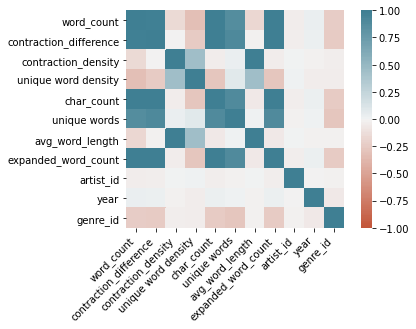

In [ ]:
corr = temp.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()                   # try with standard scalar
temp_norm = pd.DataFrame(scaler.fit_transform(temp.loc[:,['artist_id','genre_id','word_count','contraction_difference','year','contraction_density','unique word density','char_count','unique words','avg_word_length','expanded_word_count']]),columns=['artist_id','genre_id','word_count','contraction_difference','year','contraction_density','unique word density','char_count','unique words','avg_word_length','expanded_word_count'])
temp_norm.head()

,artist_id,genre_id,word_count,contraction_difference,year,contraction_density,unique word density,char_count,unique words,avg_word_length,expanded_word_count
0,0.255225,0.8,0.072658,0.061508,0.996408,0.092267,0.384371,0.065103,0.098988,0.089449,0.064046
1,0.255225,0.8,0.040790,0.039628,0.996408,0.105526,0.516019,0.041264,0.074241,0.104776,0.039893
2,0.255225,0.8,0.025813,0.029862,0.996408,0.125098,0.742112,0.030100,0.067492,0.125098,0.028940
3,0.255225,0.8,0.083811,0.067612,0.996408,0.087977,0.282899,0.073853,0.084364,0.087488,0.071299
4,0.255225,0.8,0.059911,0.053338,0.996408,0.096945,0.120879,0.057031,0.025872,0.096945,0.054834


In [ ]:
temp_norm.corr()

,artist_id,genre_id,word_count,contraction_difference,year,contraction_density,unique word density,char_count,unique words,avg_word_length,expanded_word_count
artist_id,1.000000,-0.012817,-0.032281,-0.029750,-0.006053,0.003248,0.016422,-0.030299,-0.019254,0.004444,-0.030441
genre_id,-0.012817,1.000000,-0.241857,-0.246206,-0.051687,-0.024161,-0.033703,-0.245255,-0.274656,-0.018614,-0.246104
word_count,-0.032281,-0.241857,1.000000,0.979464,0.032442,-0.153793,-0.325523,0.987524,0.868021,-0.165009,0.987761
contraction_difference,-0.029750,-0.246206,0.979464,1.000000,0.029848,-0.001609,-0.247695,0.998826,0.901524,-0.013495,0.998924
year,-0.006053,-0.051687,0.032442,0.029848,1.000000,-0.011487,-0.034381,0.030307,0.015296,-0.013593,0.030554
contraction_density,0.003248,-0.024161,-0.153793,-0.001609,-0.011487,1.000000,0.437321,-0.036229,0.032494,0.997192,-0.036623
unique word density,0.016422,-0.033703,-0.325523,-0.247695,-0.034381,0.437321,1.000000,-0.266868,0.084271,0.438748,-0.266502
char_count,-0.030299,-0.245255,0.987524,0.998826,0.030307,-0.036229,-0.266868,1.000000,0.896955,-0.047072,0.999870
unique words,-0.019254,-0.274656,0.868021,0.901524,0.015296,0.032494,0.084271,0.896955,1.000000,0.021539,0.897105
avg_word_length,0.004444,-0.018614,-0.165009,-0.013495,-0.013593,0.997192,0.438748,-0.047072,0.021539,1.000000,-0.048398


Text(0, 0.5, 'No. of songs')

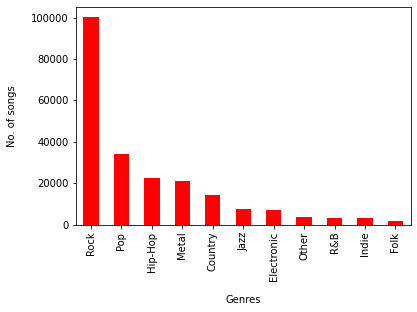

In [ ]:
temp['genre'].value_counts().plot(kind='bar',color="red");
plt.xlabel("Genres", labelpad=14)
plt.ylabel("No. of songs", labelpad=14)

In [ ]:
temp.head(1)

,song,year,artist,genre,token_lyrics,lemmatized_lyrics,uniquewords,word_count,char_count,unique words,unique word density,avg_word_length,expanded_word_count,contraction_difference,contraction_density,genre_id,artist_id
0,ego-remix,2009,beyonce-knowles,Pop,"[oh, baby, know, 'm, gon, na, cut, right, chas...",oh baby know be gon na cut right chase women m...,"[oh, baby, know, be, gon, na, cut, right, chas...",229,864,89,0.388646,3.772926,884,655,2.860262,9,2663


In [ ]:
temp1 = temp
del temp1['song']
del temp1['artist']
del temp1['token_lyrics']
del temp1['lemmatized_lyrics']
del temp1['uniquewords']
temp1

,year,genre,word_count,char_count,unique words,unique word density,avg_word_length,expanded_word_count,contraction_difference,contraction_density,genre_id,artist_id
0,2009,Pop,229,864,89,0.388646,3.772926,884,655,2.860262,9,2663
1,2009,Pop,129,548,67,0.519380,4.248062,551,422,3.271318,9,2663
2,2009,Pop,82,400,61,0.743902,4.878049,400,318,3.878049,9,2663
3,2009,Pop,264,980,76,0.287879,3.712121,984,720,2.727273,9,2663
4,2009,Pop,189,757,24,0.126984,4.005291,757,568,3.005291,9,2663
...,...,...,...,...,...,...,...,...,...,...,...,...
218205,2012,Country,185,830,93,0.502703,4.486486,833,648,3.502703,1,7525
218206,2012,Country,119,497,54,0.453782,4.176471,500,381,3.201681,1,7525
218207,2012,Country,126,517,72,0.571429,4.103175,529,403,3.198413,1,7525
218208,2012,Country,87,428,56,0.643678,4.919540,428,341,3.919540,1,7525


In [ ]:
temp.head(1)

,word_count,contraction_difference,contraction_density,unique word density,char_count,unique words,avg_word_length,expanded_word_count,artist_id,year,genre_id
0,0.072658,0.061508,0.092267,0.384371,0.065103,0.098988,0.089449,0.064046,2663,2009,9


Original sape of input dataset (218209, 10)
Feature: 0, Score: 0.04222
Feature: 1, Score: 0.05624
Feature: 2, Score: 0.02490
Feature: 3, Score: 0.11774
Feature: 4, Score: 0.05880
Feature: 5, Score: 0.05705
Feature: 6, Score: 0.02281
Feature: 7, Score: 0.02538
Feature: 8, Score: 0.03775
Feature: 9, Score: 0.55712


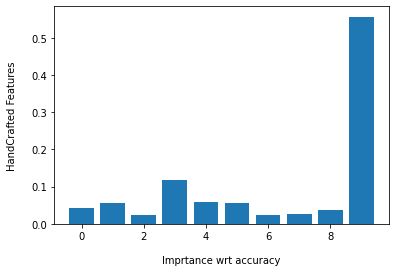

In [ ]:
# decision tree for feature importance on a classification problem
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot
# define dataset
cols=['word_count', 'year',	'char_count',	'unique words',	'unique word density',	'avg_word_length',	'expanded_word_count',	'contraction_difference',	'contraction_density',	'artist_id']
a=temp[cols]
print("Original sape of input dataset",a.shape)                              #shape of original dataset 
b=temp['genre_id']
# define the model
model = DecisionTreeClassifier()
# fit the model
model.fit(a, b)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
plt.xlabel("Imprtance wrt accuracy", labelpad=14)
plt.ylabel("HandCrafted Features", labelpad=14)
pyplot.show()

In [ ]:
# permutation feature importance with knn for classification
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import permutation_importance
from matplotlib import pyplot
# define dataset
# define the model
model = KNeighborsClassifier()
# fit the model
model.fit(a, b)
# perform permutation importance
results = permutation_importance(model, a, b, scoring='accuracy')
# get importance
importance = results.importances_mean
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

KeyboardInterrupt: ignored

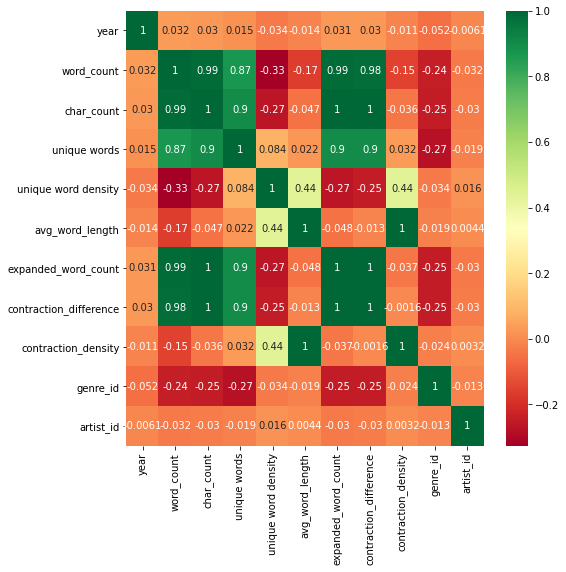

In [ ]:
import seaborn as sns
corrmat = temp1.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(8,8))
#plot heat map
g=sns.heatmap(temp1[top_corr_features].corr(),annot=True,cmap="RdYlGn")

[0.08896692 0.09509196 0.0933524  0.10643534 0.09947841 0.09052561
 0.09428456 0.09355811 0.08846859 0.14983809]


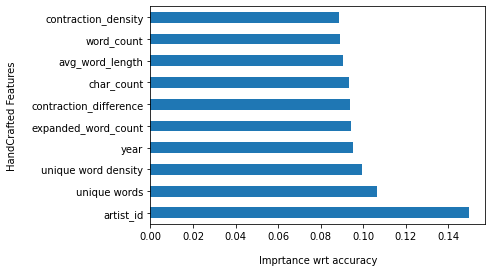

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(a,b)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=a.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.xlabel("Imprtance wrt accuracy", labelpad=14)
plt.ylabel("HandCrafted Features", labelpad=14)
plt.show()

NameError: ignored

**Naive Bayes**

In [ ]:
from sklearn.model_selection import train_test_split
cols=['word_count',	'char_count',	'unique words',	'unique word density',	'avg_word_length',	'expanded_word_count',	'contraction_difference',	'contraction_density',	'artist_id']
x=temp[cols]
print("Original sape of input dataset",x.shape)                              #shape of original dataset 
y=temp['genre']
print("Original sape of output dataset",y.shape)                        #shape of original dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15)

Original sape of input dataset (218210, 9)
Original sape of output dataset (218210,)


In [ ]:
print("X_train.shape = ",x_train.shape)
print("X_test.shape = ",x_test.shape)

X_train.shape =  (185478, 9)
X_test.shape =  (32732, 9)


In [ ]:
x_train

,word_count,char_count,unique words,unique word density,avg_word_length,expanded_word_count,contraction_difference,contraction_density,artist_id
109077,70,314,62,0.885714,4.485714,318,248,3.542857,2267
153955,127,639,46,0.362205,5.031496,639,512,4.031496,6562
7404,123,654,79,0.642276,5.317073,654,531,4.317073,9380
121869,86,393,63,0.732558,4.569767,397,311,3.616279,3155
1968,111,466,68,0.612613,4.198198,466,355,3.198198,2847
...,...,...,...,...,...,...,...,...,...
167625,63,314,35,0.555556,4.984127,314,251,3.984127,7773
153259,173,728,83,0.479769,4.208092,728,555,3.208092,4403
86241,12,56,11,0.916667,4.666667,56,44,3.666667,9340
122473,197,977,91,0.461929,4.959391,981,784,3.979695,1200


In [ ]:
y_train

109077     Rock
153955    Metal
7404       Rock
121869     Rock
1968       Rock
          ...  
167625     Rock
153259     Rock
86241      Rock
122473     Rock
155281     Rock
Name: genre, Length: 185478, dtype: object

In [ ]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(rf, cv = None, refit = False, n_iter = 50).fit(x_train, y_train)
perm_imp_eli5 = imp_df(x_train.columns, perm.feature_importances_)

ModuleNotFoundError: ignored

In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
# Predicting the Test set results
y_pred = classifier.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[    0,     4,     0,    55,     0,     0,    56,     0,   147,
            0,  1875],
       [    0,    31,     0,    64,     0,     0,    88,     0,   115,
            0,   736],
       [    0,     2,     0,    23,     0,     0,    27,     0,    22,
            0,   166],
       [    0,    11,     0,  2465,     0,     0,    75,     0,   302,
            0,   563],
       [    0,     0,     0,    12,     0,     0,    28,     0,    31,
            0,   355],
       [    0,     2,     0,    32,     0,     0,    51,     0,    82,
            0,   944],
       [    0,    14,     0,   127,     0,     0,  1003,     0,   136,
            0,  1902],
       [    0,     2,     0,    50,     0,     0,    41,     0,    75,
            0,   423],
       [    0,    21,     0,   383,     0,     0,   155,     0,  1093,
            0,  3423],
       [    0,     4,     0,    35,     0,     0,    18,     0,    79,
            0,   416],
       [    0,    94,     0,   437,     0,     0,   910,    

In [ ]:
from sklearn import metrics
print('Accuracy of Mutlinomial Naive Bayes classifier on test set: {:.4f}'.format(metrics.accuracy_score(y_test, y_pred)))

Accuracy of Mutlinomial Naive Bayes classifier on test set: 0.5097


In [ ]:
# Classification report of the multinomial naive bayes classifier
print(metrics.classification_report(y_test, y_pred, target_names=classifier.classes_))

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

     Country       0.00      0.00      0.00      2075
  Electronic       0.17      0.03      0.05      1060
        Folk       0.00      0.00      0.00       242
     Hip-Hop       0.66      0.70      0.68      3423
       Indie       0.00      0.00      0.00       448
        Jazz       0.00      0.00      0.00      1031
       Metal       0.41      0.32      0.36      3203
       Other       0.00      0.00      0.00       593
         Pop       0.32      0.22      0.26      5077
         R&B       0.00      0.00      0.00       529
        Rock       0.53      0.81      0.64     15051

    accuracy                           0.51     32732
   macro avg       0.19      0.19      0.18     32732
weighted avg       0.41      0.51      0.44     32732



In [ ]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Naive Bayes (Training set)')
plt.xlabel('Genres')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

**Decision Tree**

In [ ]:
# Fitting Decision Tree Classification to the Training set
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy',random_state = 0)
classifier.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [ ]:
# Predicting the Test set results
y_pred = classifier.predict(x_test)

In [ ]:
# Making the Confusion Matrix
labels = clf.classes_
cm = pd.DataFrame(metrics.confusion_matrix(y_test, y_pred), columns=labels, index=labels)
cm.index.name = 'True labels'
cm

,Country,Electronic,Folk,Hip-Hop,Indie,Jazz,Metal,Other,Pop,R&B,Rock
True labels,,,,,,,,,,,
Country,3196,32,7,64,21,59,95,46,193,15,448
Electronic,47,1023,14,114,19,22,85,51,176,19,508
Folk,8,8,268,16,4,9,45,3,30,2,111
Hip-Hop,91,100,26,5197,29,50,194,87,293,43,739
Indie,25,20,2,22,523,15,48,10,58,5,188
Jazz,49,33,3,48,17,1450,76,43,128,7,272
Metal,97,126,43,174,45,57,3989,72,340,19,1441
Other,37,43,9,88,17,38,53,336,145,11,315
Pop,180,189,49,322,64,113,306,167,7297,54,1552


In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7378213647403877


In [ ]:
print(metrics.classification_report(y_test, y_pred, target_names=classifier.classes_))

              precision    recall  f1-score   support

     Country       0.76      0.77      0.77      4176
  Electronic       0.49      0.49      0.49      2078
        Folk       0.50      0.53      0.52       504
     Hip-Hop       0.77      0.76      0.76      6849
       Indie       0.56      0.57      0.57       916
        Jazz       0.69      0.68      0.69      2126
       Metal       0.63      0.62      0.63      6403
       Other       0.28      0.31      0.29      1092
         Pop       0.71      0.71      0.71     10293
         R&B       0.70      0.71      0.71       980
        Rock       0.81      0.81      0.81     30046

    accuracy                           0.74     65463
   macro avg       0.63      0.63      0.63     65463
weighted avg       0.74      0.74      0.74     65463



In [ ]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()

export_graphviz(classifier, out_file=dot_data,  filled=True, rounded=True, special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [ ]:
from sklearn.linear_model import LogisticRegression
logReg = LogisticRegression()

In [ ]:
logReg.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred = logReg.predict(x_test)

In [ ]:
# Coefficients 
j = 0
for i in logReg.coef_ :
  print(logReg.classes_[j],i)
  j+=1

Country [-0.14869643 -0.27561703  1.31542927 -0.34345577  0.72553518 -0.55761928
 -0.67655348 -0.76241777  0.16418363]
Electronic [ 0.93483669 -0.03876536 -1.35277951 -0.11459907  0.04820655  0.07074734
 -0.18645689  0.17041521  0.04249759]
Folk [-0.5414161  -0.04563044  0.67887155 -0.02025116  0.02090337 -0.08443309
  0.05181371  0.10615055 -0.07643968]
Hip-Hop [ 1.99349157 -1.22070152  0.7957122   0.42095233 -3.6289703   0.34327197
 -0.14891217  3.44373674  0.0472704 ]
Indie [-0.55280888 -0.02640573  0.39886065 -0.1898705   0.00216853 -0.08670491
  0.05226403 -0.09370714  0.11539565]
Jazz [-0.12023018  0.09926493 -0.37021418 -0.14811774  1.43404443 -0.18578089
 -0.2043919  -1.40236594  0.12207113]
Metal [-2.94511763  1.01414638 -0.16150611  0.55691332  1.44996741  0.51343989
  1.53915776 -1.1505068   0.04484055]
Other [ 0.71418841 -0.04447171 -0.2233104   0.07532996  0.13020637 -0.00236793
 -0.21536997 -0.12656469 -0.00893964]
Pop [ 1.21176842 -0.39864495 -0.68056458 -0.08276157 -0.4

In [ ]:
print('Accuracy of logistic regression classifier on test set: {:.4f}'.format(logReg.score(x_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.5330


In [ ]:
print(metrics.classification_report(y_test, y_pred, target_names=classifier.classes_))

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

     Country       0.00      0.00      0.00      4176
  Electronic       0.00      0.00      0.00      2078
        Folk       0.00      0.00      0.00       504
     Hip-Hop       0.77      0.65      0.71      6849
       Indie       0.00      0.00      0.00       916
        Jazz       0.00      0.00      0.00      2126
       Metal       0.55      0.17      0.26      6403
       Other       0.00      0.00      0.00      1092
         Pop       0.44      0.09      0.15     10293
         R&B       0.00      0.00      0.00       980
        Rock       0.51      0.94      0.66     30046

    accuracy                           0.53     65463
   macro avg       0.21      0.17      0.16     65463
weighted avg       0.44      0.53      0.43     65463

